First cross-match APOGEE with GALAH, then get ages for all stars in GALAH

In [1]:
from HeaderP import *
import Astraea

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Galah data

In [2]:
galah=readfits('Data/GALAH_DR3_main_allstar_v1.fits')
print(np.shape(galah))

(588571, 207)


APOGEE data

In [4]:
apogee=pd.read_pickle('Data/APOGEE.pkl')
print(np.shape(apogee))

(473306, 202)


cross-match APOGEE and GALAH

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


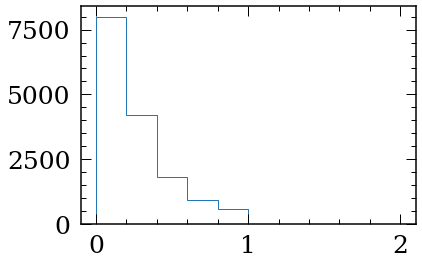

In [12]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
# galah
c1 = SkyCoord([i*u.deg for i in galah['ra']], [i*u.deg for i in galah['dec']], frame='icrs')
# apogee
c2 = SkyCoord([i*u.deg for i in apogee['RA']], [i*u.deg for i in apogee['DEC']], frame='icrs')
# cross-match
idx_sdss, d2d_sdss, d3d_sdss = c2.match_to_catalog_sky(c1)
idx=idx_sdss[d2d_sdss<1*u.arcsec]
d2d=d2d_sdss[d2d_sdss<1*u.arcsec]
plt.hist(d2d.arcsec, histtype='step', range=(0,2))

apogee_galah=apogee[d2d_sdss<1*u.arcsec]
for i in galah.columns:
    apogee_galah[i]=galah.iloc[idx][i].values
    

In [30]:
apogee[d2d_sdss<1*u.arcsec]

,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,...,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_RADIAL_VELOCITY,GAIA_RADIAL_VELOCITY_ERROR,GAIA_R_EST,GAIA_R_LO,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC
650,apogee.lco25m.s.stars.SMC1.2M00034301-7717269,lco25m.5521.SMC1.2M00034301-7717269,apogee.lco25m.s.r12-l33.SMC1.2M00034301-7717269,asStar-r12-2M00034301-7717269.fits,2M00034301-7717269,lco25m,5521,SMC1,11.120,0.024,...,12.122799,12.430286,11.663885,4.764536,0.899849,771.630145,760.335361,783.259302,6111.500000,3.9980
977,apogee.lco25m.s.stars.SMC1.2M00055448-7714368,lco25m.5497.SMC1.2M00055448-7714368,apogee.lco25m.s.r12-l33.SMC1.2M00055448-7714368,asStar-r12-2M00055448-7714368.fits,2M00055448-7714368,lco25m,5497,SMC1,11.903,0.024,...,13.311837,13.816660,12.662277,12.092903,4.260124,1349.681066,1327.061884,1373.069981,4817.299805,3.2763
1225,apogee.lco25m.s.stars.SMC1.2M00073162-7736395,lco25m.5497.SMC1.2M00073162-7736395,apogee.lco25m.s.r12-l33.SMC1.2M00073162-7736395,asStar-r12-2M00073162-7736395.fits,2M00073162-7736395,lco25m,5497,SMC1,12.438,0.023,...,13.475529,13.795722,12.997542,-9999.000000,-9999.000000,828.748659,818.097282,839.675911,6045.000000,4.3226
1271,apogee.lco25m.s.stars.SMC1.2M00074463-7721319,lco25m.5497.SMC1.2M00074463-7721319,apogee.lco25m.s.r12-l33.SMC1.2M00074463-7721319,asStar-r12-2M00074463-7721319.fits,2M00074463-7721319,lco25m,5497,SMC1,12.103,0.023,...,13.348890,13.756449,12.782094,-9999.000000,-9999.000000,438.533126,435.757400,441.343802,5137.200195,4.0532
1437,apogee.lco25m.s.stars.SMC1.2M00084228-7657447,lco25m.5497.SMC1.2M00084228-7657447,apogee.lco25m.s.r12-l33.SMC1.2M00084228-7657447,asStar-r12-2M00084228-7657447.fits,2M00084228-7657447,lco25m,5497,SMC1,12.079,0.022,...,13.418410,13.883232,12.806306,-9999.000000,-9999.000000,935.553496,924.372434,947.003359,5146.600098,3.7294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472289,apogee.apo25m.s.stars.105-45.2M23542488+1632296,apo25m.4548.105-45.2M23542488+1632296,apogee.apo25m.s.r12-l33.105-45.2M23542488+1632296,apStar-r12-2M23542488+1632296.fits,2M23542488+1632296,apo25m,4548,105-45,10.934,0.022,...,12.523714,13.085938,11.827800,-17.971381,0.623253,2031.577631,1871.752912,2219.588824,4622.700195,2.7100
472298,apogee.apo25m.s.stars.105-45.2M23543101+1610372,apo25m.4548.105-45.2M23543101+1610372,apogee.apo25m.s.r12-l33.105-45.2M23543101+1610372,apStar-r12-2M23543101+1610372.fits,2M23543101+1610372,apo25m,4548,105-45,11.942,0.022,...,13.491901,14.073365,12.786988,-9999.000000,-9999.000000,269.098847,267.284436,270.937614,4795.000000,4.5849
472323,apogee.apo25m.s.stars.105-45.2M23543916+1616199,apo25m.4548.105-45.2M23543916+1616199,apogee.apo25m.s.r12-l33.105-45.2M23543916+1616199,apStar-r12-2M23543916+1616199.fits,2M23543916+1616199,apo25m,4548,105-45,10.810,0.020,...,12.556179,13.188478,11.812212,-11.262361,0.482071,1984.959007,1855.180993,2133.434464,4448.299805,2.6930
472325,apogee.apo25m.s.stars.105-45.2M23544003+1620046,apo25m.4548.105-45.2M23544003+1620046,apogee.apo25m.s.r12-l33.105-45.2M23544003+1620046,apStar-r12-2M23544003+1620046.fits,2M23544003+1620046,apo25m,4548,105-45,12.035,0.023,...,13.463968,13.957650,12.831307,-9999.000000,-9999.000000,2044.672009,1954.977501,2142.741057,5025.899902,3.4876


In [26]:
#apogee_galah.to_pickle('Data/apogee_galah_cm.pkl')
print(np.shape(apogee_galah))

(619, 412)


get ages

In [15]:
ages=pd.read_pickle('Data/CannonDR16_cut.pkl')


In [23]:
ages.GAIA_SOURCE_ID

0        3415959637095259392
1        3417185489481721216
2        3416392535438467328
3        2077018151105094144
4        2077014131015713536
                ...         
64394    1391467840813936128
64395    1391375310038411392
64396    1391475984071856128
64397    1391582980297212416
64398    1391262335218551552
Name: GAIA_SOURCE_ID, Length: 64399, dtype: int64

In [24]:
apogee_galah=pd.merge(apogee_galah,ages[['Age','Age_err','GAIA_SOURCE_ID']],
                      left_on='source_id',right_on='GAIA_SOURCE_ID')

In [25]:
apogee_galah

,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,...,e_a_ks,bc_ks,parallax,parallax_error,ruwe,phot_g_mean_mag,bp_rp,Age,Age_err,GAIA_SOURCE_ID_y
0,apogee.apo25m.s.stars.100-60.2M00103649+0052397,apo25m.4590.100-60.2M00103649+0052397,apogee.apo25m.s.r12-l33.100-60.2M00103649+0052397,apStar-r12-2M00103649+0052397.fits,2M00103649+0052397,apo25m,4590,100-60,10.610,0.022,...,0.033867,2.064718,0.832774,0.076584,1.169946,12.123884,1.205710,7.095572,3.510618,2546347884866963456
1,apogee.apo25m.s.stars.120-60.2M00425604+0145357,apo25m.5049.120-60.2M00425604+0145357,apogee.apo25m.s.r12-l33.120-60.2M00425604+0145357,apStar-r12-2M00425604+0145357.fits,2M00425604+0145357,apo25m,5049,120-60,8.191,0.027,...,0.041054,2.135785,1.641193,0.078554,0.862526,9.797815,1.276665,13.527689,6.602543,2549549422208614912
2,apogee.lco25m.s.stars.120-61-O.2M00425604+0145357,lco25m.5463.120-61-O.2M00425604+0145357,apogee.lco25m.s.r12-l33.120-61-O.2M00425604+01...,asStar-r12-2M00425604+0145357.fits,2M00425604+0145357,lco25m,5463,120-61-O,8.191,0.027,...,0.041054,2.135785,1.641193,0.078554,0.862526,9.797815,1.276665,13.527689,6.602543,2549549422208614912
3,apogee.apo25m.s.stars.140-60.2M01271503+0225171,apo25m.5142.140-60.2M01271503+0225171,apogee.apo25m.s.r12-l33.140-60.2M01271503+0225171,apStar-r12-2M01271503+0225171.fits,2M01271503+0225171,apo25m,5142,140-60,12.183,0.024,...,0.029972,2.016641,0.173928,0.039220,1.251569,13.728032,1.205311,9.579870,4.838721,2559416989311843328
4,apogee.apo25m.s.stars.165-30.2M03253609+1901210,apo25m.5144.165-30.2M03253609+1901210,apogee.apo25m.s.r12-l33.165-30.2M03253609+1901210,apStar-r12-2M03253609+1901210.fits,2M03253609+1901210,apo25m,5144,165-30,9.027,0.024,...,0.037806,2.032219,0.938848,0.043138,1.066134,10.703691,1.334445,2.470878,1.313080,57706291534137856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,apogee.apo25m.s.stars.060-30.2M21272123+0654119,apo25m.5205.060-30.2M21272123+0654119,apogee.apo25m.s.r12-l33.060-30.2M21272123+0654119,apStar-r12-2M21272123+0654119.fits,2M21272123+0654119,apo25m,5205,060-30,10.961,0.026,...,0.027294,1.937723,0.819964,0.036308,1.034544,12.504619,1.211568,7.783049,3.903215,1739082427664508928
615,apogee.apo25m.s.stars.060-30.2M21272733+0615165,apo25m.5205.060-30.2M21272733+0615165,apogee.apo25m.s.r12-l33.060-30.2M21272733+0615165,apStar-r12-2M21272733+0615165.fits,2M21272733+0615165,apo25m,5205,060-30,12.020,0.026,...,0.028591,2.118147,0.323081,0.034339,1.114048,13.721486,1.325288,9.051843,4.495704,1738972098544460544
616,apogee.apo25m.s.stars.060-30.2M21281404+0703202,apo25m.5205.060-30.2M21281404+0703202,apogee.apo25m.s.r12-l33.060-30.2M21281404+0703202,apStar-r12-2M21281404+0703202.fits,2M21281404+0703202,apo25m,5205,060-30,10.657,0.022,...,0.027294,2.085076,0.697488,0.046419,1.606490,12.316832,1.295325,8.553000,4.243905,1739091082023925248
617,apogee.apo25m.s.stars.060-30.2M21291026+0624143,apo25m.5205.060-30.2M21291026+0624143,apogee.apo25m.s.r12-l33.060-30.2M21291026+0624143,apStar-r12-2M21291026+0624143.fits,2M21291026+0624143,apo25m,5205,060-30,10.053,0.027,...,0.030113,2.193712,0.655300,0.042494,1.116377,11.805938,1.400997,4.805969,2.361186,1738992405149886720
